### Zadania

Celem zadań jest napisanie (fragmentów) programów, które wyodrębnią obiekty znajdujące się na podanych obrazach. Rozumie się przez to doprowadzenie obrazów do postaci binarnej z wyraźną separacją między obiektami a tłem oraz poszczególnymi obiektami.

Samo osiągnięcie "jakiegoś" wyniku (`cv2.threshold` odpalone, próg wybrany "z palca", _coś tam_ widać, wynik wyświetlony) to co najwyżej połowa sukcesu (i oceny). Ważne jest pokazanie w drodze eksperymentu odpowiedzi na pytania - czy te podane w treści zadania, czy takie, które się Tobie nasunęły.

In [3]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

##### Zad. 1: Monety szare

Dane są dwa czarno-białe obrazy monet, `monety_szare` oraz `monety_szare_szum`, z których drugi zawiera pewien poziom zakłóceń. Dokonaj binaryzacji tych obrazów za pomocą progowania. W jaki sposób ustalisz wartość progu? Jaki wpływ mają zakłócenia w drugim obrazie? Jak się ich pozbędziesz?

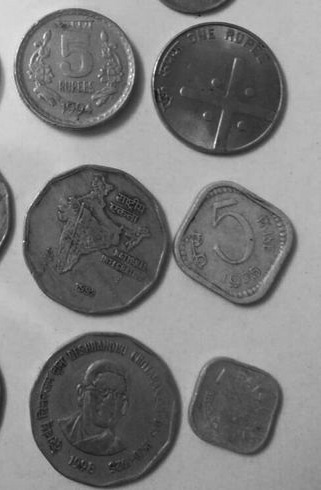

In [4]:
# 1A
monety_szare = cv2.imread('data/Monety_szare.bmp')
Image.fromarray(cv2.cvtColor(monety_szare, cv2.COLOR_BGR2RGB))

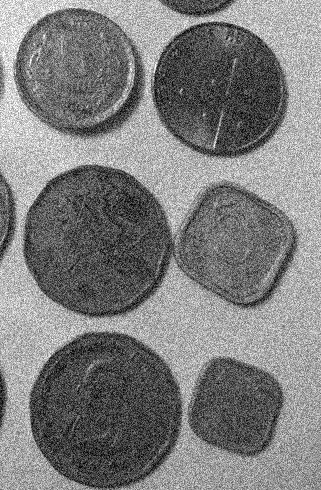

In [5]:
# 1B
monety_szare_szum = cv2.imread('data/Monety_szare_szum.bmp')
Image.fromarray(cv2.cvtColor(monety_szare_szum, cv2.COLOR_BGR2RGB))

Rozwiązanie części 1A:

In [19]:
def show_hist(img, channels=3):
    for i in range(channels):
        plt.hist(img[..., i].flatten(), bins=255, density=True)
        plt.show()

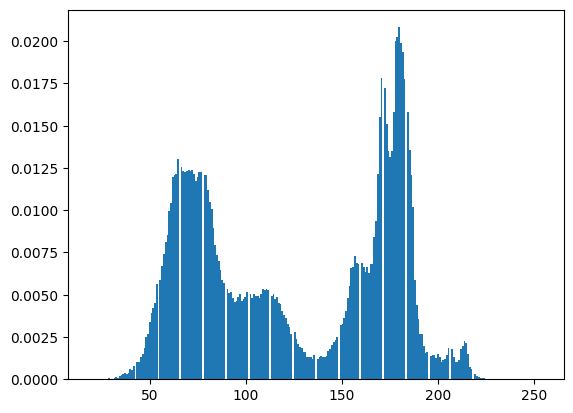

In [21]:
show_hist(monety_szare, channels=1)  #same for each channel

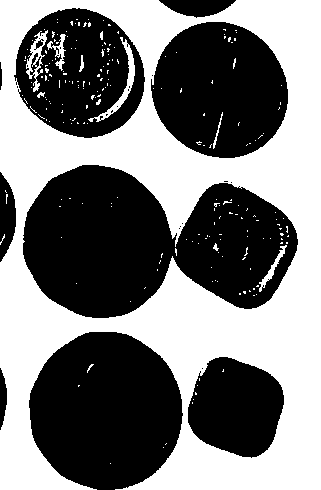

In [8]:
coins_th, coins_th_img = cv2.threshold(monety_szare[...,2], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
Image.fromarray(coins_th_img)

Rozwiązanie części 1B:


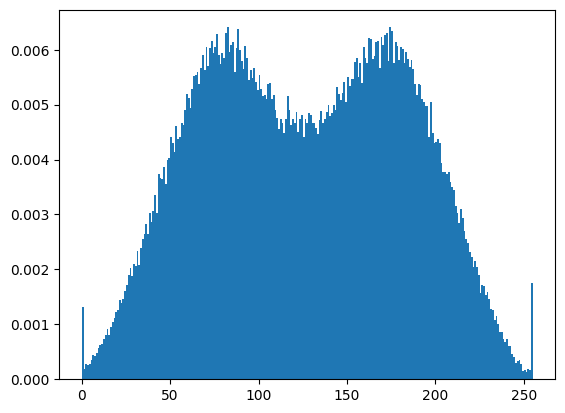

In [23]:
show_hist(monety_szare_szum, channels=1)  # same for each channel

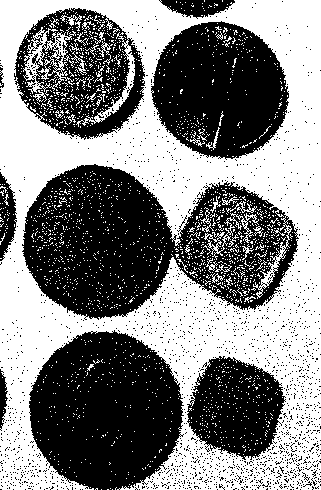

In [26]:
noise_coins_th, noise_coins_th_img = cv2.threshold(monety_szare_szum[...,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # same for each channel
Image.fromarray(noise_coins_th_img)

##### Zad. 2: Monety kolorowe

Na podobnej zasadzie dokonaj binaryzacji poniższych obrazów kolorowych. Skorzystaj z modelu barw HSV. Posłuż się kształtem histogramu dla wybranej składowej.

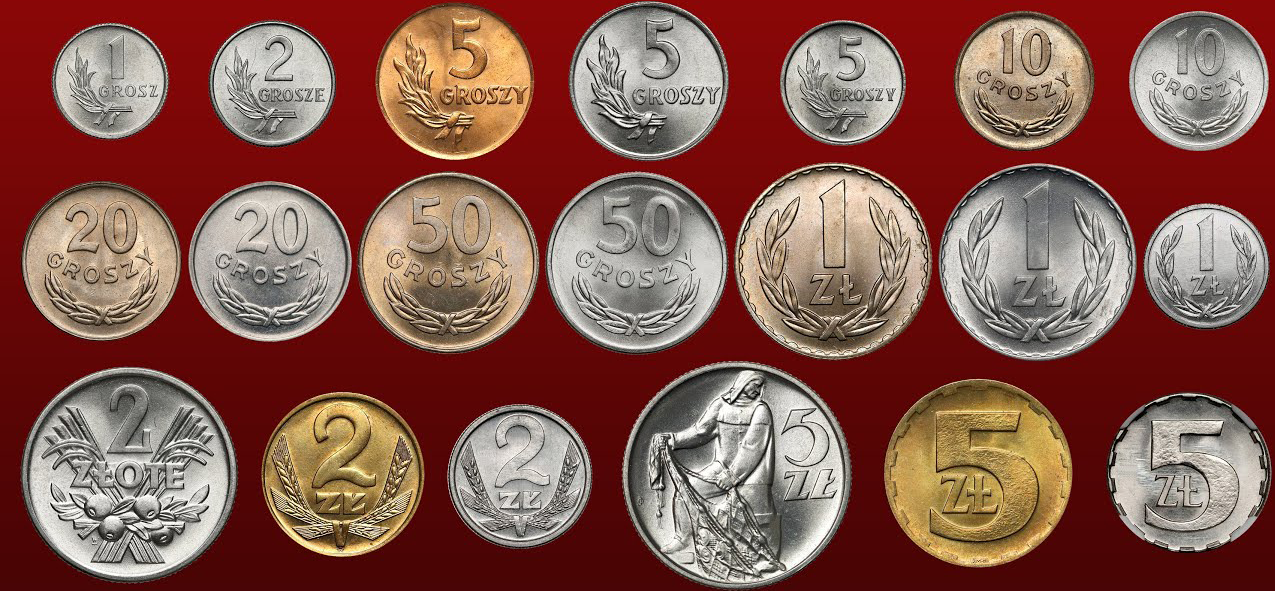

In [11]:
# 2A
monety_kolor = cv2.imread('data/Monety_kolor.bmp')
Image.fromarray(cv2.cvtColor(monety_kolor, cv2.COLOR_BGR2RGB))

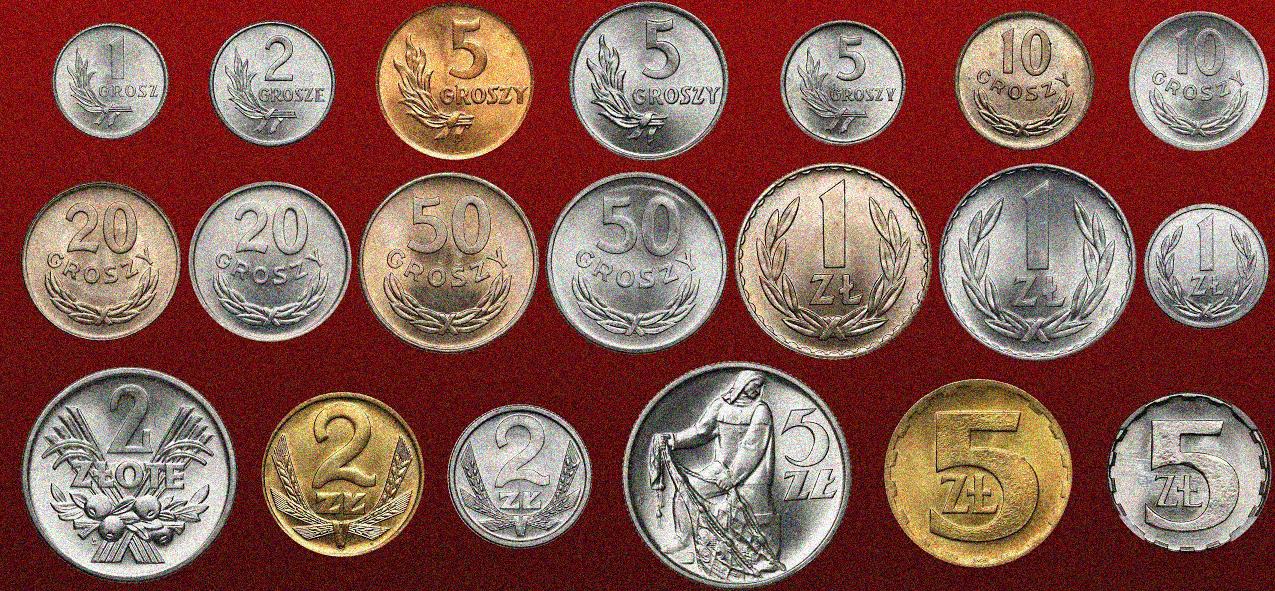

In [12]:
# 2B
monety_kolor_szum = cv2.imread('data/Monety_kolor_szum.bmp')
Image.fromarray(cv2.cvtColor(monety_kolor_szum, cv2.COLOR_BGR2RGB))

Rozwiązanie części 2A:

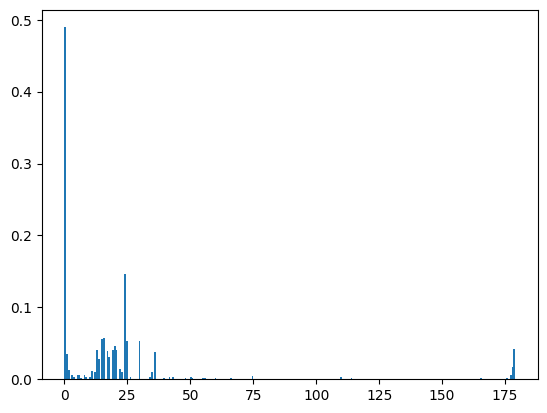

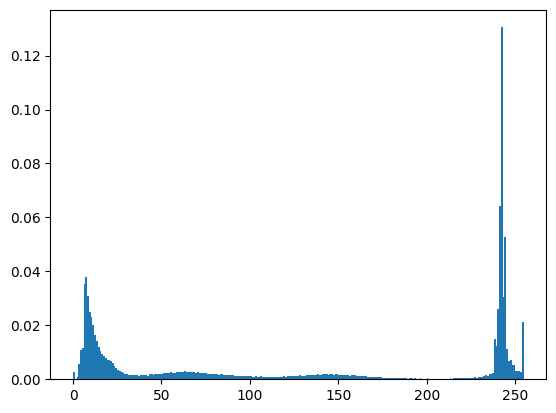

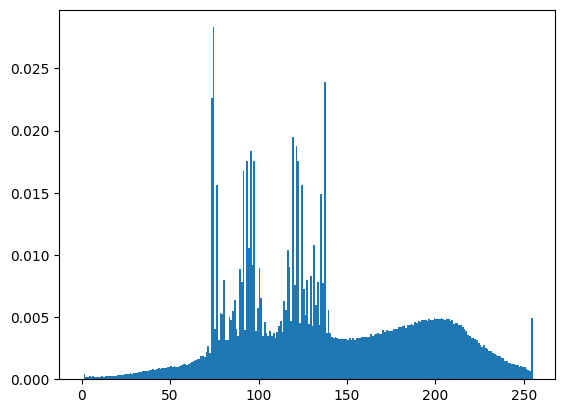

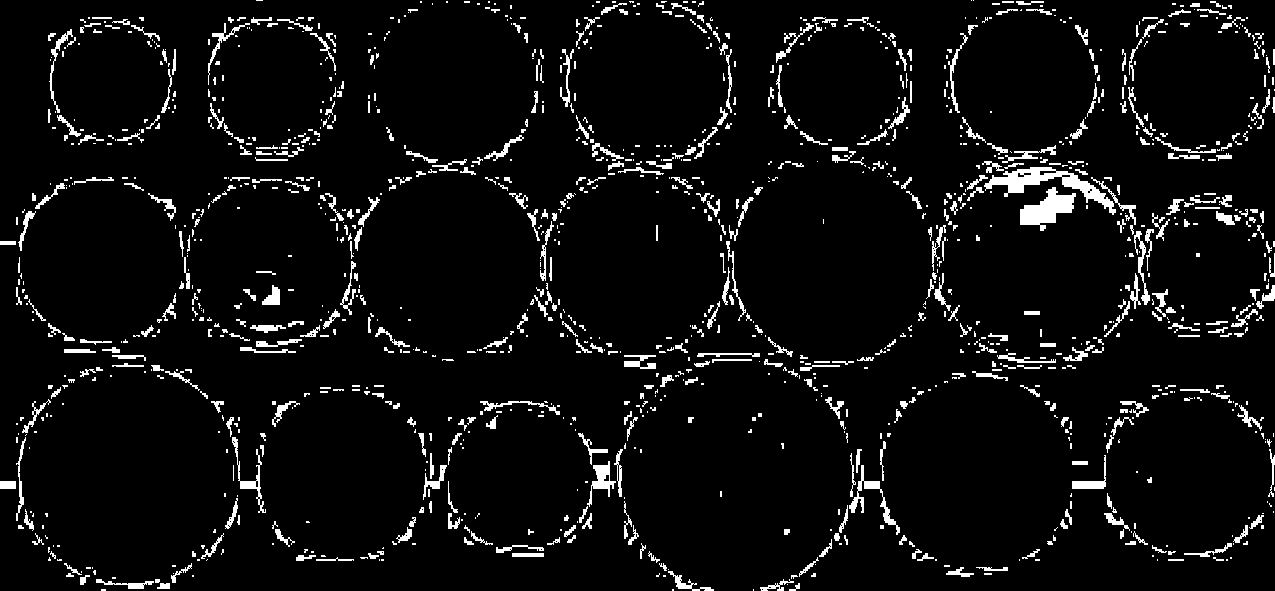

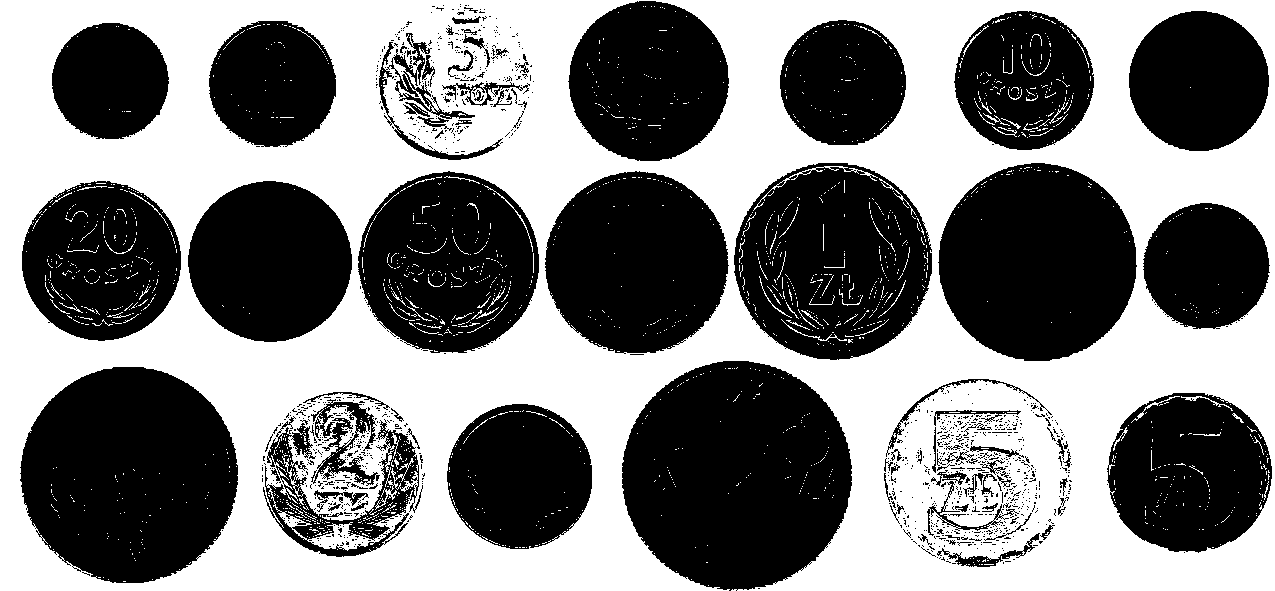

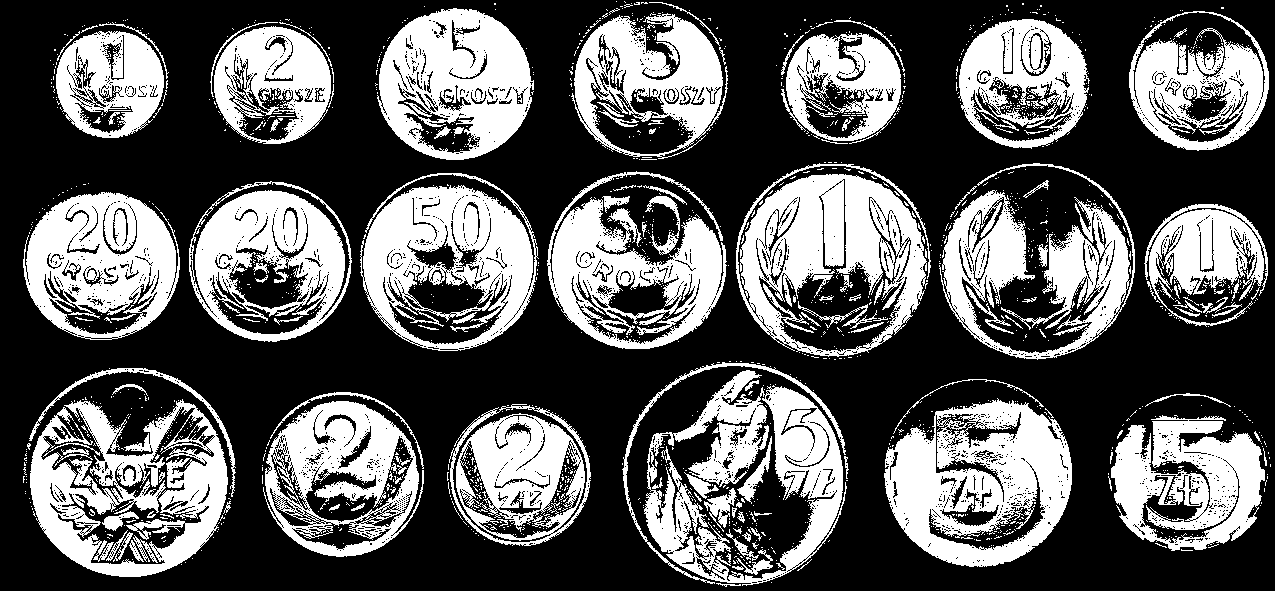

In [35]:
def otsu_foreach_hsv(img):
    color_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    show_hist(color_hsv, channels=3)
    for i in range(3):
        clr_coins_th, clr_coins_th_img = cv2.threshold(color_hsv[..., i], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # same for each channel
        display(Image.fromarray(clr_coins_th_img))

otsu_foreach_hsv(monety_kolor)

Rozwiązanie części 2B:


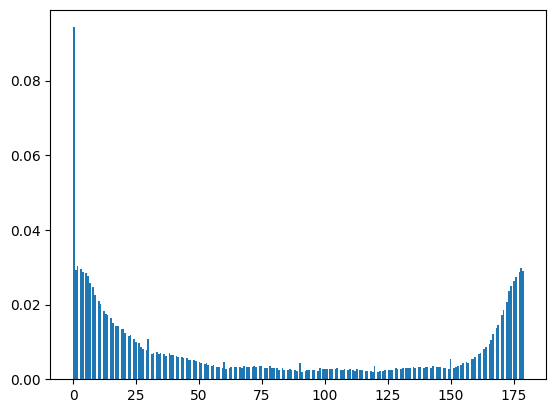

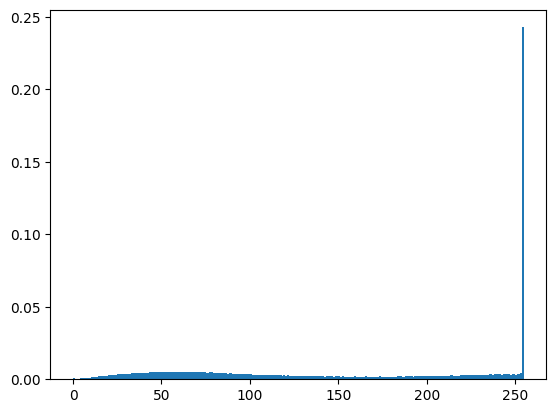

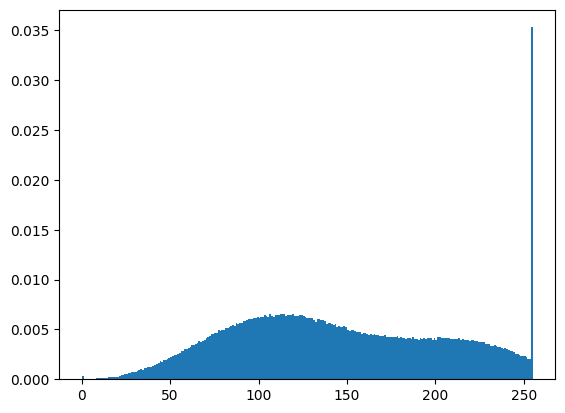

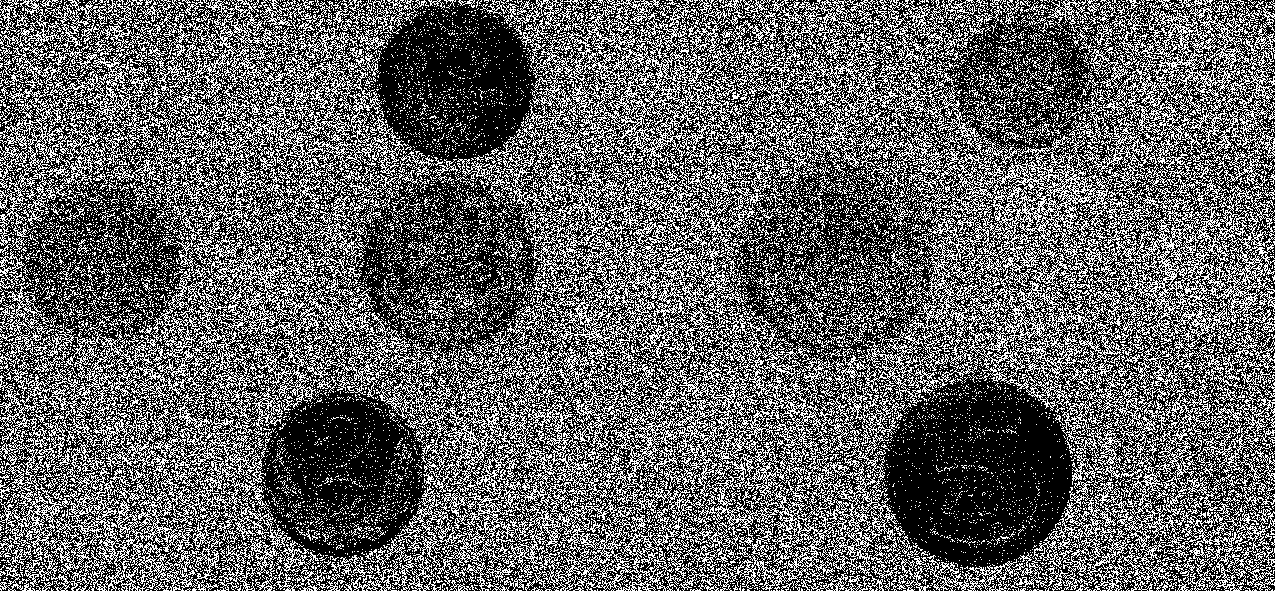

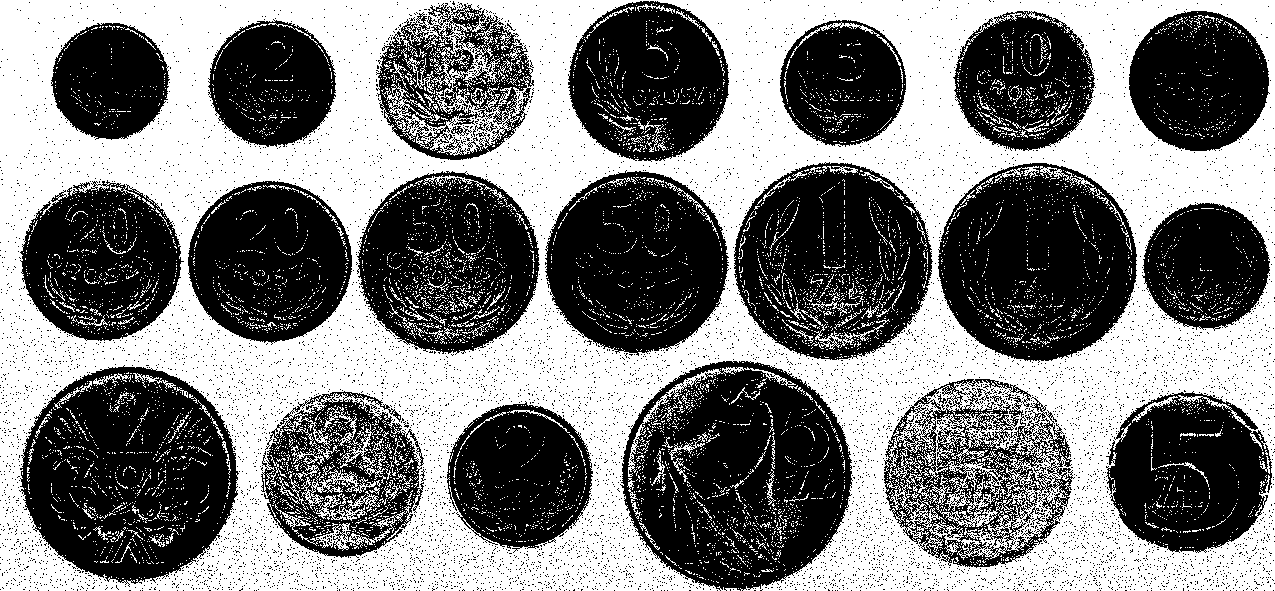

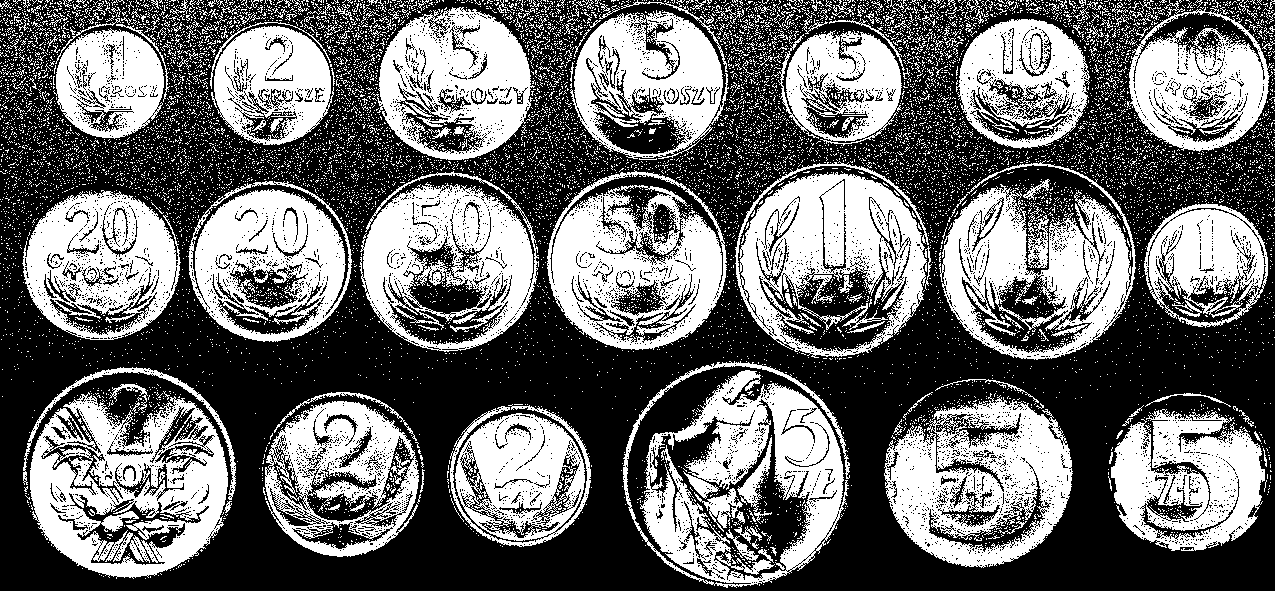

In [36]:
otsu_foreach_hsv(monety_kolor_szum)

##### Zad. 3: Tekst

W tym przypadku należy wyodrębnić litery od bardzo nierównomiernie oświetlonego tła. Skorzystaj z binaryzacji metodą Otsu. Zastosuj binaryzację w sposób lokalny (oknem przesuwnym). Jaki wpływ ma rozmiar okna na jakość binaryzacji? Jak przesuwać okno?

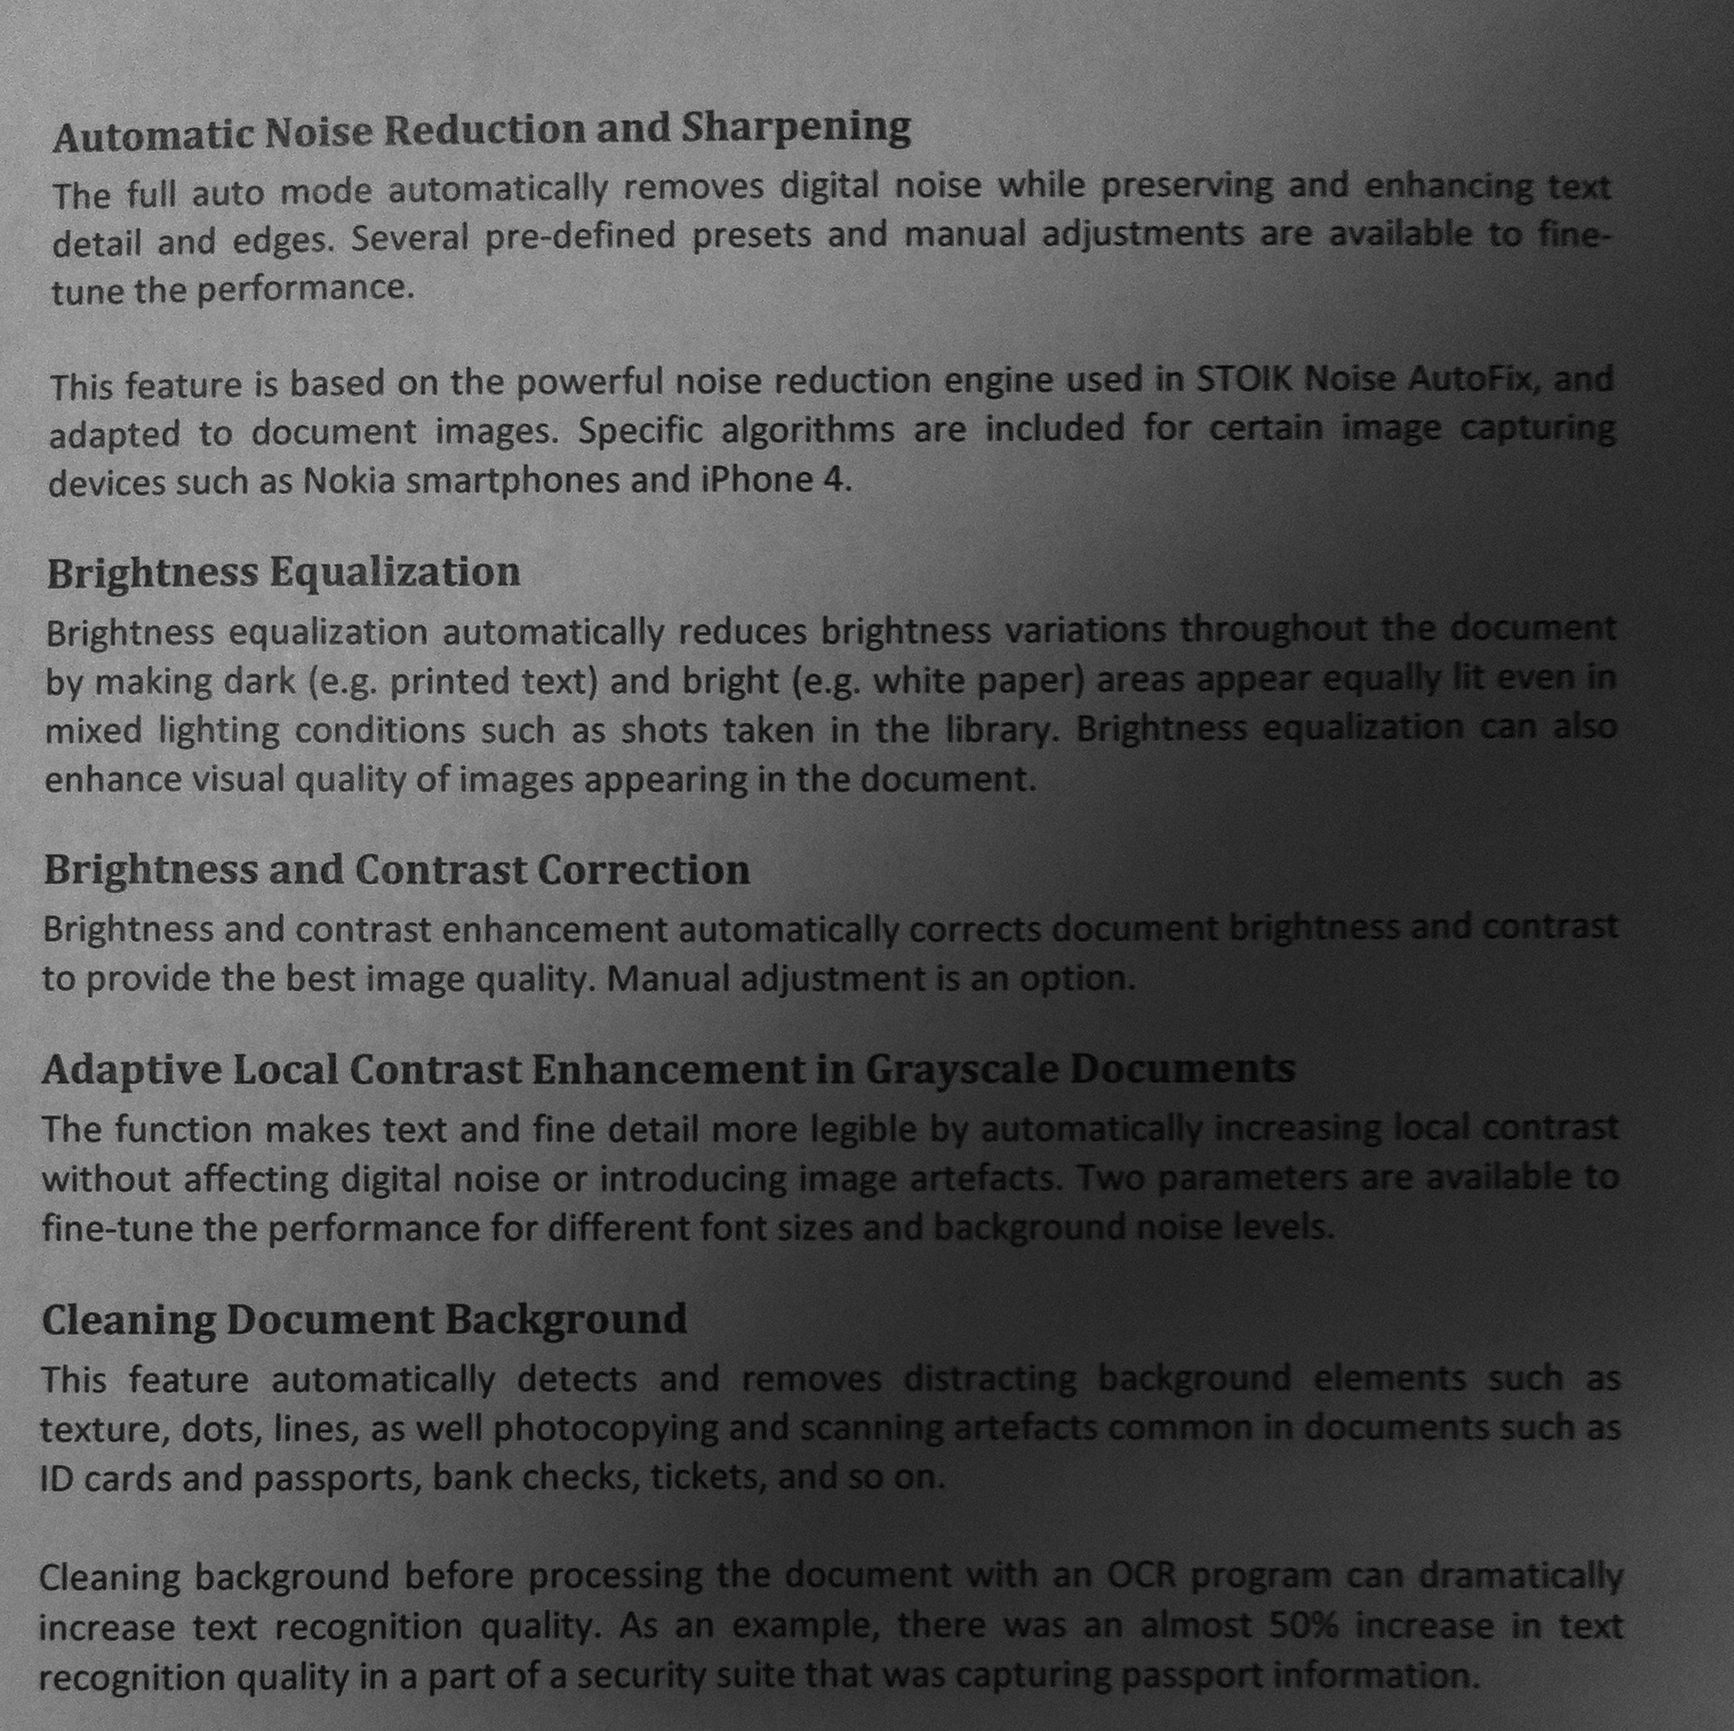

In [37]:
tekst = cv2.imread('data/Tekst1.bmp')
Image.fromarray(cv2.cvtColor(tekst, cv2.COLOR_BGR2GRAY))

Rozwiązanie: